Diabetes against all ML
In this project, will test all what we studied about classifications in the ML class using the diabetes dataset.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.metrics import precision_score,recall_score,roc_curve,f1_score,precision_recall_curve,roc_auc_score
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use("ggplot")

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### PCA
First we start with PCA. Using PCA, show the importance of each of the PCA dimensions on a bar plot. What is a reasonable number of dimensions in your opinion to obtain at least 95% explained_var_ratio?

Text(0.5, 1.0, 'PCA Feature Importance with Dimensions=2')

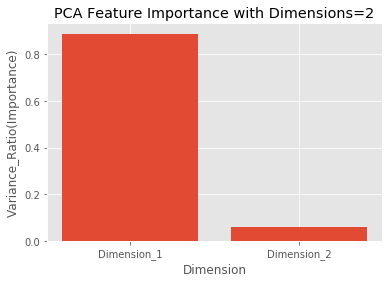

In [3]:
X=df.drop("Outcome",1)
y=df["Outcome"]
pca_2=PCA(2)
pca_3=PCA(3)
pca_4=PCA(4)
pca_8=PCA(8)
X_2=pca_2.fit_transform(X,y)
X_3=pca_3.fit_transform(X,y)
X_4=pca_4.fit_transform(X,y)
X_8=pca_8.fit_transform(X,y)
var_2=pca_2.explained_variance_ratio_
var_3=pca_3.explained_variance_ratio_
var_4=pca_4.explained_variance_ratio_
var_8=pca_8.explained_variance_ratio_
plt.bar(["Dimension_1","Dimension_2"],var_2)
plt.xlabel("Dimension")
plt.ylabel("Variance_Ratio(Importance)")
plt.title("PCA Feature Importance with Dimensions=2")

Text(0.5, 1.0, 'PCA Feature Importance with Dimensions=3')

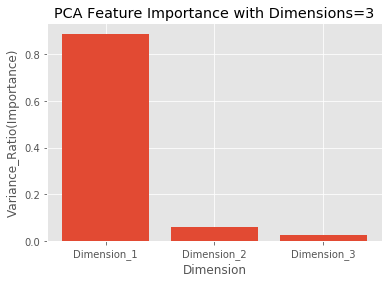

In [4]:
plt.bar(["Dimension_1","Dimension_2","Dimension_3"],var_3)
plt.xlabel("Dimension")
plt.ylabel("Variance_Ratio(Importance)")
plt.title("PCA Feature Importance with Dimensions=3")

Text(0.5, 1.0, 'PCA Feature Importance with Dimensions=4')

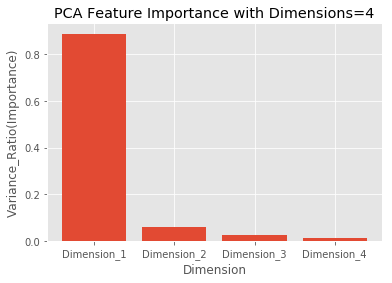

In [5]:
plt.bar(["Dimension_1","Dimension_2","Dimension_3","Dimension_4"],var_4)
plt.xlabel("Dimension")
plt.ylabel("Variance_Ratio(Importance)")
plt.title("PCA Feature Importance with Dimensions=4")

Text(0.5, 1.0, 'PCA Feature Importance with Dimensions=8')

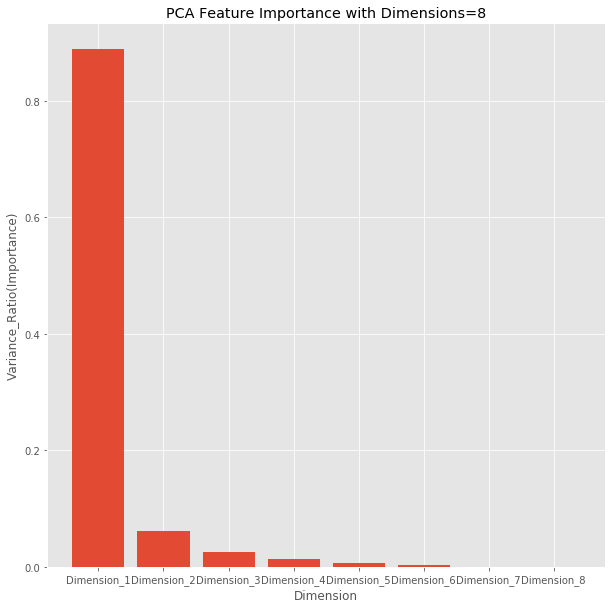

In [6]:
plt.figure(figsize=(10,10))
plt.bar(["Dimension_1","Dimension_2","Dimension_3","Dimension_4","Dimension_5","Dimension_6","Dimension_7",'Dimension_8']
        ,var_8)
plt.xlabel("Dimension")
plt.ylabel("Variance_Ratio(Importance)")
plt.title("PCA Feature Importance with Dimensions=8")

After running PCA analysis for a number of times with different dimensions,I believe 2 dimension are enough to explain about 95% of variance ratio in relation to the label, therefore my final conclusion is 2 dimensions.

## KMeans
Do clustering using KMeans on the original dataset (not the PCA) using K=2. Calculate Homogonity and Completeness score. Is that a good clustering?

In [7]:
from sklearn.metrics import homogeneity_completeness_v_measure
clf=KMeans(n_clusters=2)
clf.fit(X)
y_pred=clf.predict(X)
homogeneity,completeness ,v_measure =homogeneity_completeness_v_measure(y,y_pred)
print("The homogeneity score is",homogeneity)
print("The completeness score is",completeness)

The homogeneity score is 0.026659254297179365
The completeness score is 0.0331406091804888


Both the Homogeneity and completeness score are below par, a good score must be closer to one but both of these scores are really low which is indicative of the fact that Kmeans with only 2 cluster do not give justice to the given dataset, as most possibly, the distribution of feature might be reflected by more than 2 clusters

### Split the data
Split the original dataset (not the PCA) to have 30% test data

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

### Logistic Regression
Using LR, what is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve

C:\Users\MMOHTASHIM\Anaconda3\envs\env_full\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of Logistic Regression(testing) is: 0.7792207792207793
The accuracy of Logistic Regression(training) is: 0.7858472998137802
The precision of Logistic Regression(training) is: 0.7575757575757576
The precision of Logistic Regression(testing) is: 0.7741935483870968
The recall of Logistic Regression(training) is: 0.546448087431694
The recall of Logistic Regression(testing) is: 0.5647058823529412
The f1 score of Logistic Regression(training) is: 0.634920634920635
The f1 score of Logistic Regression(testing) is: 0.653061224489796


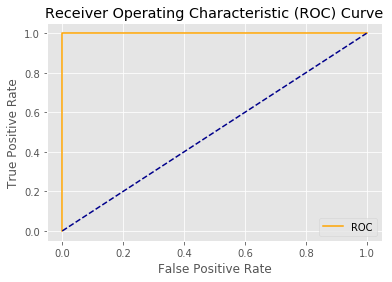

In [9]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred=clf.predict(X)
probs=clf.predict_proba(X)[:,1]
print("The accuracy of Logistic Regression(testing) is:",clf.score(X_test,y_test))
print("The accuracy of Logistic Regression(training) is:",clf.score(X_train,y_train))
print("The precision of Logistic Regression(training) is:",precision_score(y_train,y_pred_train))
print("The precision of Logistic Regression(testing) is:",precision_score(y_test,y_pred_test))
print("The recall of Logistic Regression(training) is:",recall_score(y_train,y_pred_train))
print("The recall of Logistic Regression(testing) is:",recall_score(y_test,y_pred_test))
print("The f1 score of Logistic Regression(training) is:",f1_score(y_train,y_pred_train))
print("The f1 score of Logistic Regression(testing) is:",f1_score(y_test,y_pred_test))
##Now drawing roc curve
fpr, tpr, thresholds = roc_curve(y_pred, probs)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


plot the test precision curve and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

(0, 1)

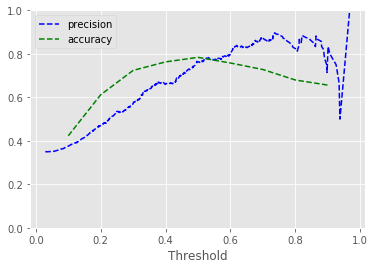

In [10]:
##plotting accuracy requires a little more work
df=pd.DataFrame()
df["thresholds"]=probs
df["actual_labels"]=y
accuracy=[]
threshold=np.arange(0.1,1,.1).tolist()
for i in threshold:
    df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
    df["Correct"]=df["actual_labels"]==df["predicted_labels"]
    correct=len(df[(df["Correct"]==True)])
    accuracy.append(correct/len(df))

precisions, recalls, thresholds = precision_recall_curve(y, probs)
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(threshold, accuracy, 'g--', label = 'accuracy')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])


## Deep Neural Networks
Using Keras, build a DNN that has better accuracy than LR. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve?

Epoch 1/10
537/537 [==============================] - 0s 534us/sample - loss: 1.8593 - accuracy: 0.5922
Epoch 2/10
537/537 [==============================] - 0s 99us/sample - loss: 0.8386 - accuracy: 0.6387
Epoch 3/10
537/537 [==============================] - 0s 89us/sample - loss: 0.9929 - accuracy: 0.5978
Epoch 4/10
537/537 [==============================] - 0s 106us/sample - loss: 0.7028 - accuracy: 0.6816
Epoch 5/10
537/537 [==============================] - 0s 93us/sample - loss: 0.6411 - accuracy: 0.6797
Epoch 6/10
537/537 [==============================] - 0s 104us/sample - loss: 0.6200 - accuracy: 0.6927
Epoch 7/10
537/537 [==============================] - 0s 100us/sample - loss: 0.6579 - accuracy: 0.6834
Epoch 8/10
537/537 [==============================] - 0s 99us/sample - loss: 0.5593 - accuracy: 0.7318
Epoch 9/10
537/537 [==============================] - 0s 106us/sample - loss: 0.6379 - accuracy: 0.6983
Epoch 10/10
231/231 [==============================] - 0s 359us/samp

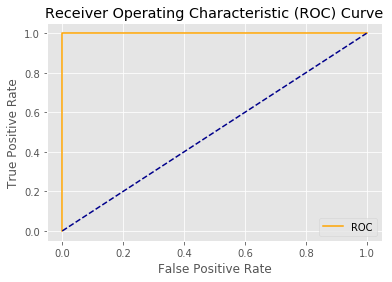

In [11]:
from tensorflow.keras import layers
clf = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(8,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2,activation="softmax")])
clf.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
clf.fit(X_train, y_train, epochs=10)
y_pred_train=clf.predict_classes(X_train)
y_pred_test=clf.predict_classes(X_test)
y_pred=clf.predict_classes(X)
probs=clf.predict_proba(X)[:,1]
print("The accuracy of Deep Neural Networks(testing) is:",clf.evaluate(X_test,y_test)[-1])
print("The accuracy of Deep Neural Networks(training) is:",clf.evaluate(X_train,y_train)[-1])
print("The precision of Deep Neural Networks(training) is:",precision_score(y_train,y_pred_train))
print("The precision of Deep Neural Networks(testing) is:",precision_score(y_test,y_pred_test))
print("The recall of Deep Neural Networks(training) is:",recall_score(y_train,y_pred_train))
print("The recall of Deep Neural Networks(testing) is:",recall_score(y_test,y_pred_test))
print("The f1 score of Deep Neural Networks(training) is:",f1_score(y_train,y_pred_train))
print("The f1 score of Deep Neural Networks(testing) is:",f1_score(y_test,y_pred_test))
##Now drawing roc curve
fpr, tpr, thresholds = roc_curve(y_pred, probs)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

(0, 1)

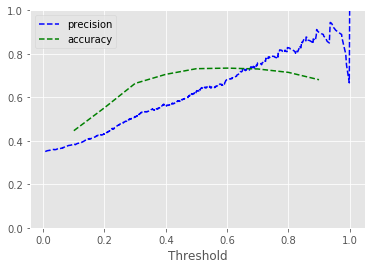

In [12]:
##using same techinque for deep learning
df=pd.DataFrame()
df["thresholds"]=probs
df["actual_labels"]=y
accuracy=[]
threshold=np.arange(0.1,1,.1).tolist()
for i in threshold:
    df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
    df["Correct"]=df["actual_labels"]==df["predicted_labels"]
    correct=len(df[(df["Correct"]==True)])
    accuracy.append(correct/len(df))

precisions, recalls, thresholds = precision_recall_curve(y, probs)
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(threshold, accuracy, 'g--', label = 'accuracy')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])


## Random Forest
Build a random forest with `n_estimators=100`. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve? Is the model overfitting

The accuracy of Random Forest(testing) is: 0.7359307359307359
The accuracy of Random Forest(training) is: 1.0
The precision of Random Forest(training) is: 1.0
The precision of Random Forest(testing) is: 0.7
The recall of Random Forest(training) is: 1.0
The recall of Random Forest(testing) is: 0.49411764705882355
The f1 score of Random Forest(training) is: 1.0
The f1 score of Random Forest(testing) is: 0.5793103448275863


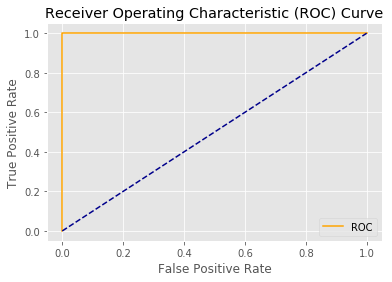

In [13]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred=clf.predict(X)
probs=clf.predict_proba(X)[:,1]
print("The accuracy of Random Forest(testing) is:",clf.score(X_test,y_test))
print("The accuracy of Random Forest(training) is:",clf.score(X_train,y_train))
print("The precision of Random Forest(training) is:",precision_score(y_train,y_pred_train))
print("The precision of Random Forest(testing) is:",precision_score(y_test,y_pred_test))
print("The recall of Random Forest(training) is:",recall_score(y_train,y_pred_train))
print("The recall of Random Forest(testing) is:",recall_score(y_test,y_pred_test))
print("The f1 score of Random Forest(training) is:",f1_score(y_train,y_pred_train))
print("The f1 score of Random Forest(testing) is:",f1_score(y_test,y_pred_test))
##Now drawing roc curve
fpr, tpr, thresholds = roc_curve(y_pred, probs)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

I would suggest ,it is overfitting due to a prefect score of 1 in training phase which is reflective of an overfitting model

build another model to limit the overfitting problem by using `n_estimators=1000, max_depth=8` as your random forest parameters. Is the overfitting better now?

The accuracy of Random Forest(testing) is: 0.7445887445887446
The accuracy of Random Forest(training) is: 0.9702048417132216
The precision of Random Forest(training) is: 0.9940828402366864
The precision of Random Forest(testing) is: 0.7096774193548387
The recall of Random Forest(training) is: 0.9180327868852459
The recall of Random Forest(testing) is: 0.5176470588235295
The f1 score of Random Forest(training) is: 0.9545454545454546
The f1 score of Random Forest(testing) is: 0.5986394557823129


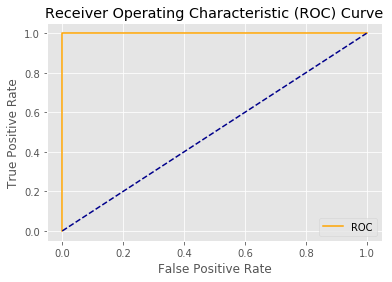

In [14]:
clf=RandomForestClassifier(n_estimators=100,max_depth=8)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred=clf.predict(X)
probs=clf.predict_proba(X)[:,1]
print("The accuracy of Random Forest(testing) is:",clf.score(X_test,y_test))
print("The accuracy of Random Forest(training) is:",clf.score(X_train,y_train))
print("The precision of Random Forest(training) is:",precision_score(y_train,y_pred_train))
print("The precision of Random Forest(testing) is:",precision_score(y_test,y_pred_test))
print("The recall of Random Forest(training) is:",recall_score(y_train,y_pred_train))
print("The recall of Random Forest(testing) is:",recall_score(y_test,y_pred_test))
print("The f1 score of Random Forest(training) is:",f1_score(y_train,y_pred_train))
print("The f1 score of Random Forest(testing) is:",f1_score(y_test,y_pred_test))
##Now drawing roc curve
fpr, tpr, thresholds = roc_curve(y_pred, probs)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Training score is away from prefect which suggest hint of regularization due to max_dept parameter ,therefore yes overfitting is better but by an minimal amount. A better option would be to decrease the number of trees in the random forest or yet further reduce the depth of forest which will further generalize our model.

plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

(0, 1)

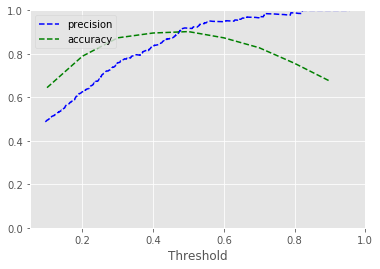

In [15]:
##using same techinque for deep learning
df=pd.DataFrame()
df["thresholds"]=probs
df["actual_labels"]=y
accuracy=[]
threshold=np.arange(0.1,1,.1).tolist()
for i in threshold:
    df["predicted_labels"]=np.where(df["thresholds"]>=i,1,0)
    df["Correct"]=df["actual_labels"]==df["predicted_labels"]
    correct=len(df[(df["Correct"]==True)])
    accuracy.append(correct/len(df))

precisions, recalls, thresholds = precision_recall_curve(y, probs)
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(threshold, accuracy, 'g--', label = 'accuracy')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])

# Finally: 
- Write a few lines about each of the three models and if there is one superior model and why do you think so?

1-LogisticRegression-It has the highest accuracy in the testing phase and recall,precision are also not too bad. Further the model is not overfiiting which is shown by the respective training score. Further,logisitic regression seems logical in this particular context, as we have two classes annd the distribution of both classes is almost same so Logistic Regression which uses a threshold of 0.5 seems fair in this context and prehaps this is the reason why it performing above par.Moreover f1 score is also better as compare to the other model which suggest better capitalization of the data.

2-Deep Neural Network-Accuracy is less than Logistic Regression which is expected because Deep Learning is use for high-level feature extraction but the data given is too simple for Neural Netwokr architecture.  However, what suprise me is that it is not overfitting which might be because I am no using too much epochs. One more interesting this about NNs in this case, is that true positve rate or recall(testing) is the best, which suggest NN is actually prone to making more false positives ,which is also explained by low precision(testing) score.

3-RandomForest-Clearly the model is overfitting as explained earlier. The fact that its testing accuracy is lower than logistic regression but training score is 1.0,means model is worse in terms of generalization and capitilization.All other indicators seems to suggest the same story.

Note that in threshold graph accuracy starts to decrease after the threshold of 0.5 which suggest its is the best threshold to classify the data. Given Logistic Regression inherently works with this threshold means the model is best and is complemented by the reasons explained earlier. 